In [22]:
#Import Dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import numpy as np
from collections import Counter 

In [23]:
coded_data=pd.read_csv("../Resources/CodedData.csv")
coded_data=coded_data.drop(columns="Unnamed: 0")
coded_data.head()

,type_Ereq,type_aband,type_assist,type_stray,type_surr,cond_aged,cond_inj,cond_norm,cond_nurs,cond_other,...,hound,herding,toy,terrier,pit bull,cur,g_misc,small,med,large
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [24]:
#Define feature set, dropping outcome
X=coded_data.drop(columns="LongStay")
X.columns


Index(['type_Ereq', 'type_aband', 'type_assist', 'type_stray', 'type_surr',
       'cond_aged', 'cond_inj', 'cond_norm', 'cond_nurs', 'cond_other',
       'cond_sick', 'Age_Adult', 'Age_Puppy', 'Age_Senior', 'Age_Young',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_July', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Color_Black', 'Color_Black/Brown',
       'Color_Black/Tan', 'Color_Black/White', 'Color_Brindle', 'Color_Brown',
       'Color_Brown/Tan', 'Color_Brown/White', 'Color_Gray',
       'Color_Gray/White', 'Color_Merle', 'Color_Red', 'Color_Red/White',
       'Color_Sable', 'Color_Tan', 'Color_Tricolor', 'Color_White', 'mix',
       'sex', 'snstatus', 'restrict', 'prior', 'sporting', 'working',
       'non-sporting', 'hound', 'herding', 'toy', 'terrier', 'pit bull', 'cur',
       'g_misc', 'small', 'med', 'large'],
      dtype='object')

In [25]:
#Outcome is prolonged length of stay
y=coded_data["LongStay"]

In [26]:
#Split into training and testing sets, using default settings of 75/25 stratified split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [27]:
#Using Bernoulli Naive Bayes because all of our data are categorical, and after dummy coding, entered as 0,1 binary features
from sklearn.naive_bayes import BernoulliNB

NB=BernoulliNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)


In [28]:
print("Accuracy score (training): {0:.3f}".format(
    NB.score(X_train,y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    NB.score(X_test,y_test)))
print(classification_report(y_test, predictions))

Accuracy score (training): 0.704
Accuracy score (validation): 0.701
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     13454
           1       0.43      0.39      0.41      4877

    accuracy                           0.70     18331
   macro avg       0.61      0.60      0.61     18331
weighted avg       0.69      0.70      0.70     18331



In [29]:
#Create confusion matrix for Naive Bayes
cm=confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0", "Actual 1"], 
                      columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,10928,2526
Actual 1,2960,1917


In [30]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features=X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. cond_nurs (0.004757)
2. cond_norm (0.004582)
3. cond_inj (0.003426)
4. Age_Puppy (0.002859)
5. type_surr (0.002684)
6. med (0.001844)
7. Color_Black/Tan (0.001222)
8. mix (0.000960)
9. Age_Young (0.000786)
10. Color_Tan (0.000775)
11. type_assist (0.000666)
12. Month_June (0.000655)
13. sex (0.000436)
14. Color_Black/White (0.000426)
15. cond_other (0.000360)
16. Month_Apr (0.000295)
17. working (0.000273)
18. Color_Gray (0.000251)
19. Color_Black/Brown (0.000251)
20. Month_Nov (0.000240)
21. sporting (0.000218)
22. Month_May (0.000218)
23. cond_sick (0.000185)
24. Color_White (0.000175)
25. cond_aged (0.000153)
26. g_misc (0.000109)
27. Color_Brown/Tan (0.000087)
28. Color_Red/White (0.000076)
29. Month_Oct (0.000044)
30. Color_Merle (0.000044)
31. Color_Sable (0.000011)
32. Age_Adult (0.000000)
33. type_Ereq (0.000000)
34. Month_Jan (-0.000033)
35. Month_Feb (-0.000033)
36. Month_Sep (-0.000044)
37. Month_July (-0.000087)
38. Month_Aug (-0.000109)
39. Color_Black 

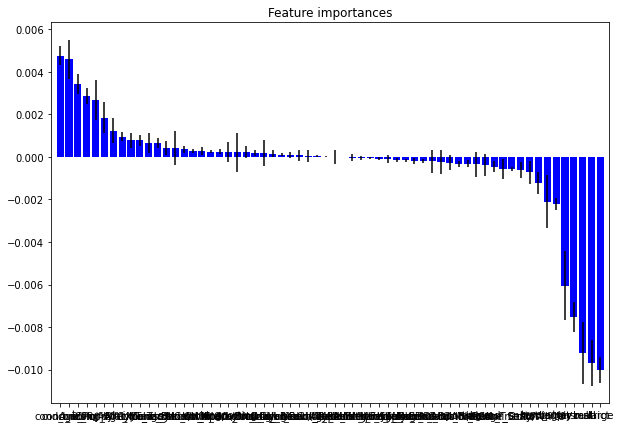

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[indices[i]] for i in range(62)])
plt.xlim([-1, X_test.shape[1]])
plt.show()